In [5]:
import ultralytics as ul
from ultralytics import YOLO as yl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


In [2]:
ul.checks()

Ultralytics YOLOv8.0.109  Python-3.11.3 torch-2.0.1+cpu CPU
Setup complete  (8 CPUs, 11.9 GB RAM, 221.4/237.7 GB disk)


In [4]:
# model = yl('yolov8m-seg.pt')
# task = 'segment'
# mode = 'train'
# epoch = 100
# data = 'dataset.yaml'
# model = 'yolov8m-seg.pt'
# imgsz = 640
# batch = 8
# task=segment, mode=train, epochs=100, data=dataset.yaml, model=yolov8m-seg.pt, imgsz=640

In [12]:
model = yl('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='dataset.yaml', epochs=100)  # train the model

Ultralytics YOLOv8.0.109  Python-3.11.3 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=dataset.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=False, lr0=0

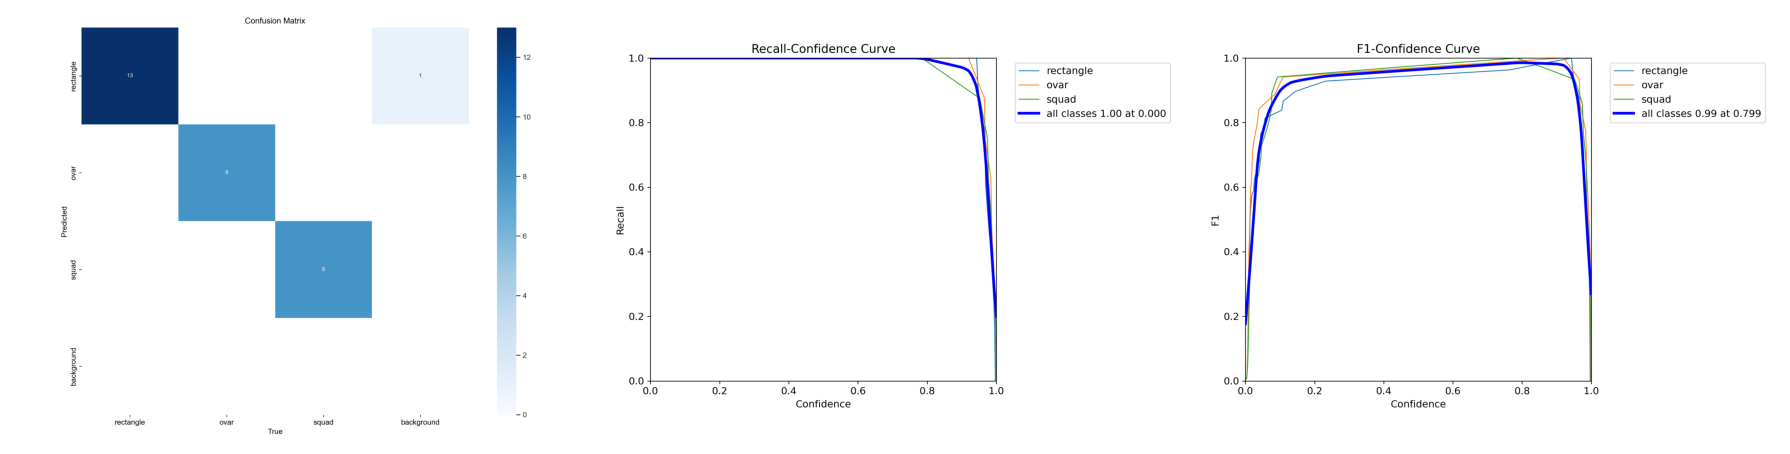

In [19]:
# List of image file paths
image_paths = ['train_results/confusion_matrix.png', 'train_results/MaskR_curve.png', 'train_results/BoxF1_curve.png']

# Define the size of the displayed images
image_width = 6  # Width of each image in inches
image_height = 5  # Height of each image in inches

# Calculate the number of rows and columns based on the number of images
num_images = len(image_paths)
num_cols = 3  # Number of columns in the grid
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Set up the figure and subplots with the specified size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * image_width, num_rows * image_height))

# Iterate over the images and display them in subplots
for i, ax in enumerate(axes.flat):
    # Check if there are more images than subplots
    if i < num_images:
        # Read and display the image
        img = mpimg.imread(image_paths[i])
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with all the images
plt.show()

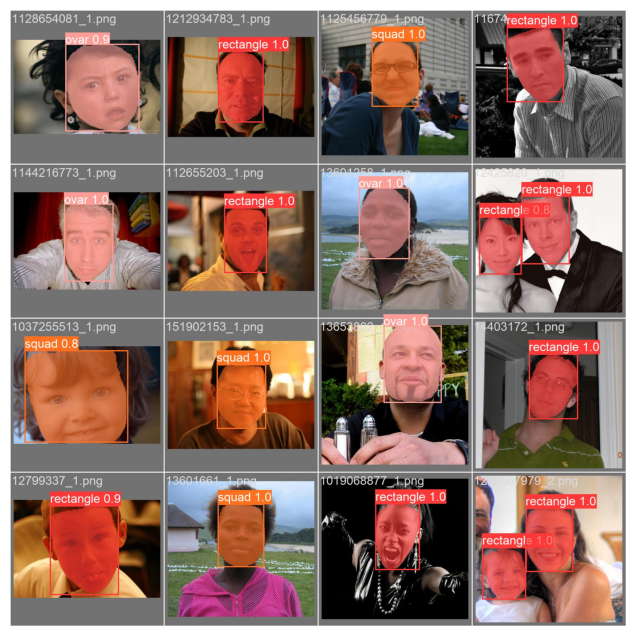

In [27]:
image_path = "train_results/val_batch0_pred.jpg"

# Read the image
image = mpimg.imread(image_path)

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the width and height as desired

# Display the image
ax.imshow(image)
ax.axis('off')  # Turn off axis labels

# Show the image
plt.show()


image 1/1 C:\Users\Red\PycharmProjects\hair-model\utils\img.jpg: 384x640 1 rectangle, 269.5ms
Speed: 3.0ms preprocess, 269.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


TypeError: Image data of dtype object cannot be converted to float

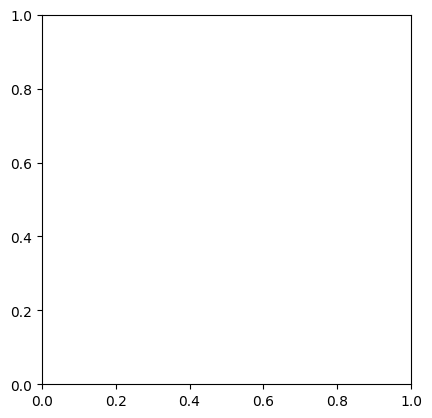

In [6]:
shape_model = yl("yolov8n-seg-custom.pt")
shape_model.predict(source = "./utils/img.jpg")
shape_model
